In [1]:
y_true = [1,1,0,0,2,1,0,2,2]
y_pred = [1,1,0,1,1,0,0,2,1]

In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]], dtype=int64)

In [3]:
import pandas as pd
df = pd.DataFrame({"y_true":y_true, "y_pred":y_pred})

In [4]:
pd.crosstab(df.y_true, df.y_pred, margins=True)

y_pred,0,1,2,All
y_true,,,,
0,2,1,0,3
1,1,2,0,3
2,0,2,1,3
All,3,5,1,9


In [5]:
def fmeasure(table) :
    precision = table[1,1]/(table[0,1]+table[1,1])   # TP/(FP+TP)
    recall = table[1,1]/(table[1,0]+table[1,1])      # TP/(FN+TP)
    return (2*precision*recall/(precision+recall)) 

In [6]:
import numpy as np
table = np.array([[1613,  22],
                  [  81,  77]])
fmeasure(table)    

0.5992217898832685

In [7]:
result = pd.read_csv("model_result.csv")

In [8]:
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [9]:
pd.crosstab(result.y_true, result.y_pred)

y_pred,0,1
y_true,,
0,1613,22
1,81,77


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [11]:
from sklearn.metrics import precision_score
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [12]:
from sklearn.metrics import recall_score
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [13]:
# specificity
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [14]:
# fallout, 오류율
1-recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [15]:
from sklearn.metrics import f1_score
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [16]:
from sklearn.datasets import make_classification

In [17]:
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=0)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

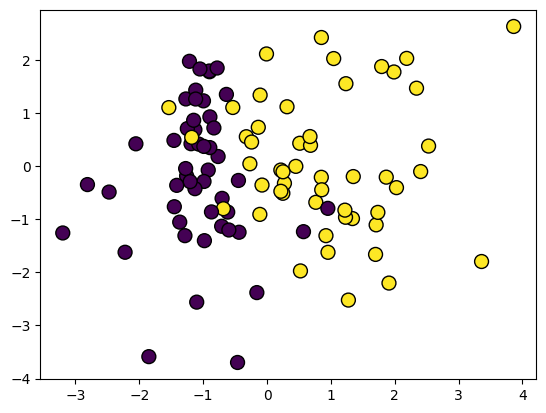

In [19]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100,
            edgecolor='k')
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0)

In [21]:
y_pred = model.predict(X)

In [22]:
f_value = model.decision_function(X)

In [23]:
import numpy as np
df = pd.DataFrame(np.c_[f_value, y_pred, y],
                  columns=["f_value", "y_pred", "y_true"])

In [24]:
df.head()

,f_value,y_pred,y_true
0,-1.162727,0.0,0.0
1,-1.663346,0.0,0.0
2,-1.926325,0.0,0.0
3,4.390119,1.0,1.0
4,6.405586,1.0,1.0


In [25]:
df.sort_values("f_value", ascending=False, inplace=True)

In [26]:
df.head()

,f_value,y_pred,y_true
5,11.454496,1.0,1.0
11,8.170554,1.0,1.0
72,7.143225,1.0,1.0
97,7.111102,1.0,1.0
23,7.018470,1.0,1.0


In [27]:
df

,f_value,y_pred,y_true
5,11.454496,1.0,1.0
11,8.170554,1.0,1.0
72,7.143225,1.0,1.0
97,7.111102,1.0,1.0
23,7.018470,1.0,1.0
...,...,...,...
44,-5.587140,0.0,0.0
49,-5.607419,0.0,0.0
16,-5.707310,0.0,0.0
25,-6.484490,0.0,0.0


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[48,  2],
       [ 5, 45]], dtype=int64)

In [29]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.9

In [30]:
specificity = recall_score(y, y_pred, pos_label=0)

In [31]:
fallout = 1-specificity

In [32]:
fallout

0.040000000000000036

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, 
                                 model.decision_function(X))

In [34]:
fpr

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
       0.76, 0.76, 1.  ])

In [35]:
tpr

array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
       0.98, 1.  , 1.  ])

In [36]:
thresholds

array([12.45449559, 11.45449559,  2.6601419 ,  2.65484312,  1.60696234,
        1.50599055, -0.16668978, -1.40700746, -1.408684  , -1.92632464,
       -2.02228104, -2.55383198, -2.65345426, -7.86293217])

In [37]:
recall = recall_score(y, y_pred)

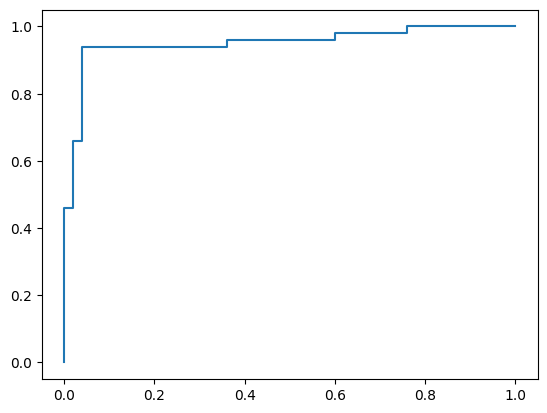

In [38]:
plt.plot(fpr, tpr)
plt.show()

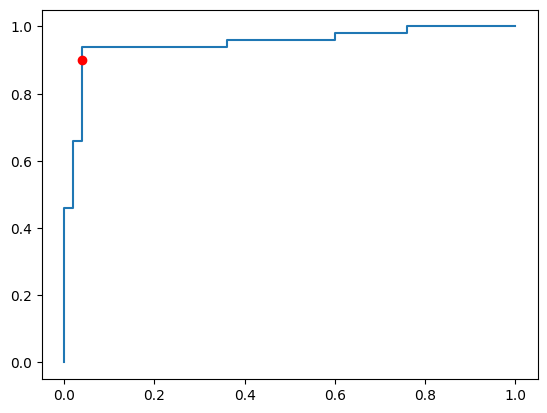

In [39]:
plt.plot(fpr, tpr)
plt.plot([fallout], [recall], 'ro')
plt.show()

In [40]:
X, y = make_classification(n_samples=1000, 
                           weights=[0.95, 0.05],
                           random_state=5)

In [41]:
from sklearn.svm import SVC
model1 = LogisticRegression().fit(X, y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)

In [42]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)

In [43]:
pd.crosstab(y, pred1)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [44]:
pd.crosstab(y, pred2)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [45]:
fpr1, tpr1, thr1 = roc_curve(y, 
                             model1.decision_function(X))
fpr2, tpr2, thr2 = roc_curve(y,
                             model2.decision_function(X))

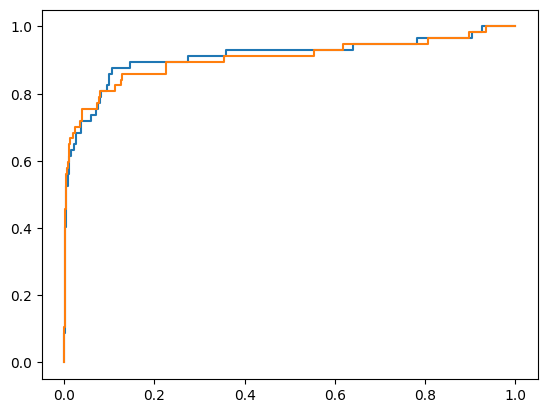

In [46]:
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.show()

In [47]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

In [48]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

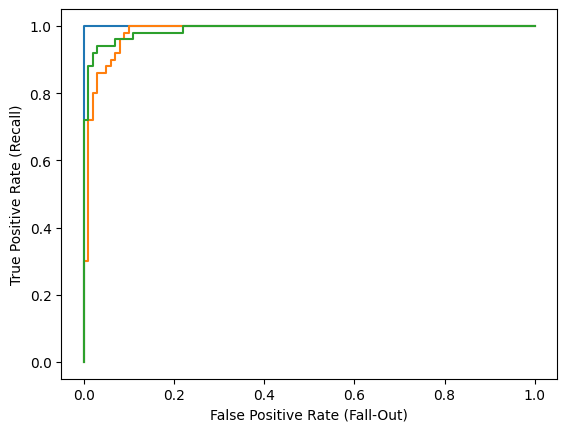

In [50]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(
        y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [51]:
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [52]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [53]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [54]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0), # arc
            make_circles(noise=0.2, factor=0.5, random_state=1), # circle
            linearly_separable # linear
            ]

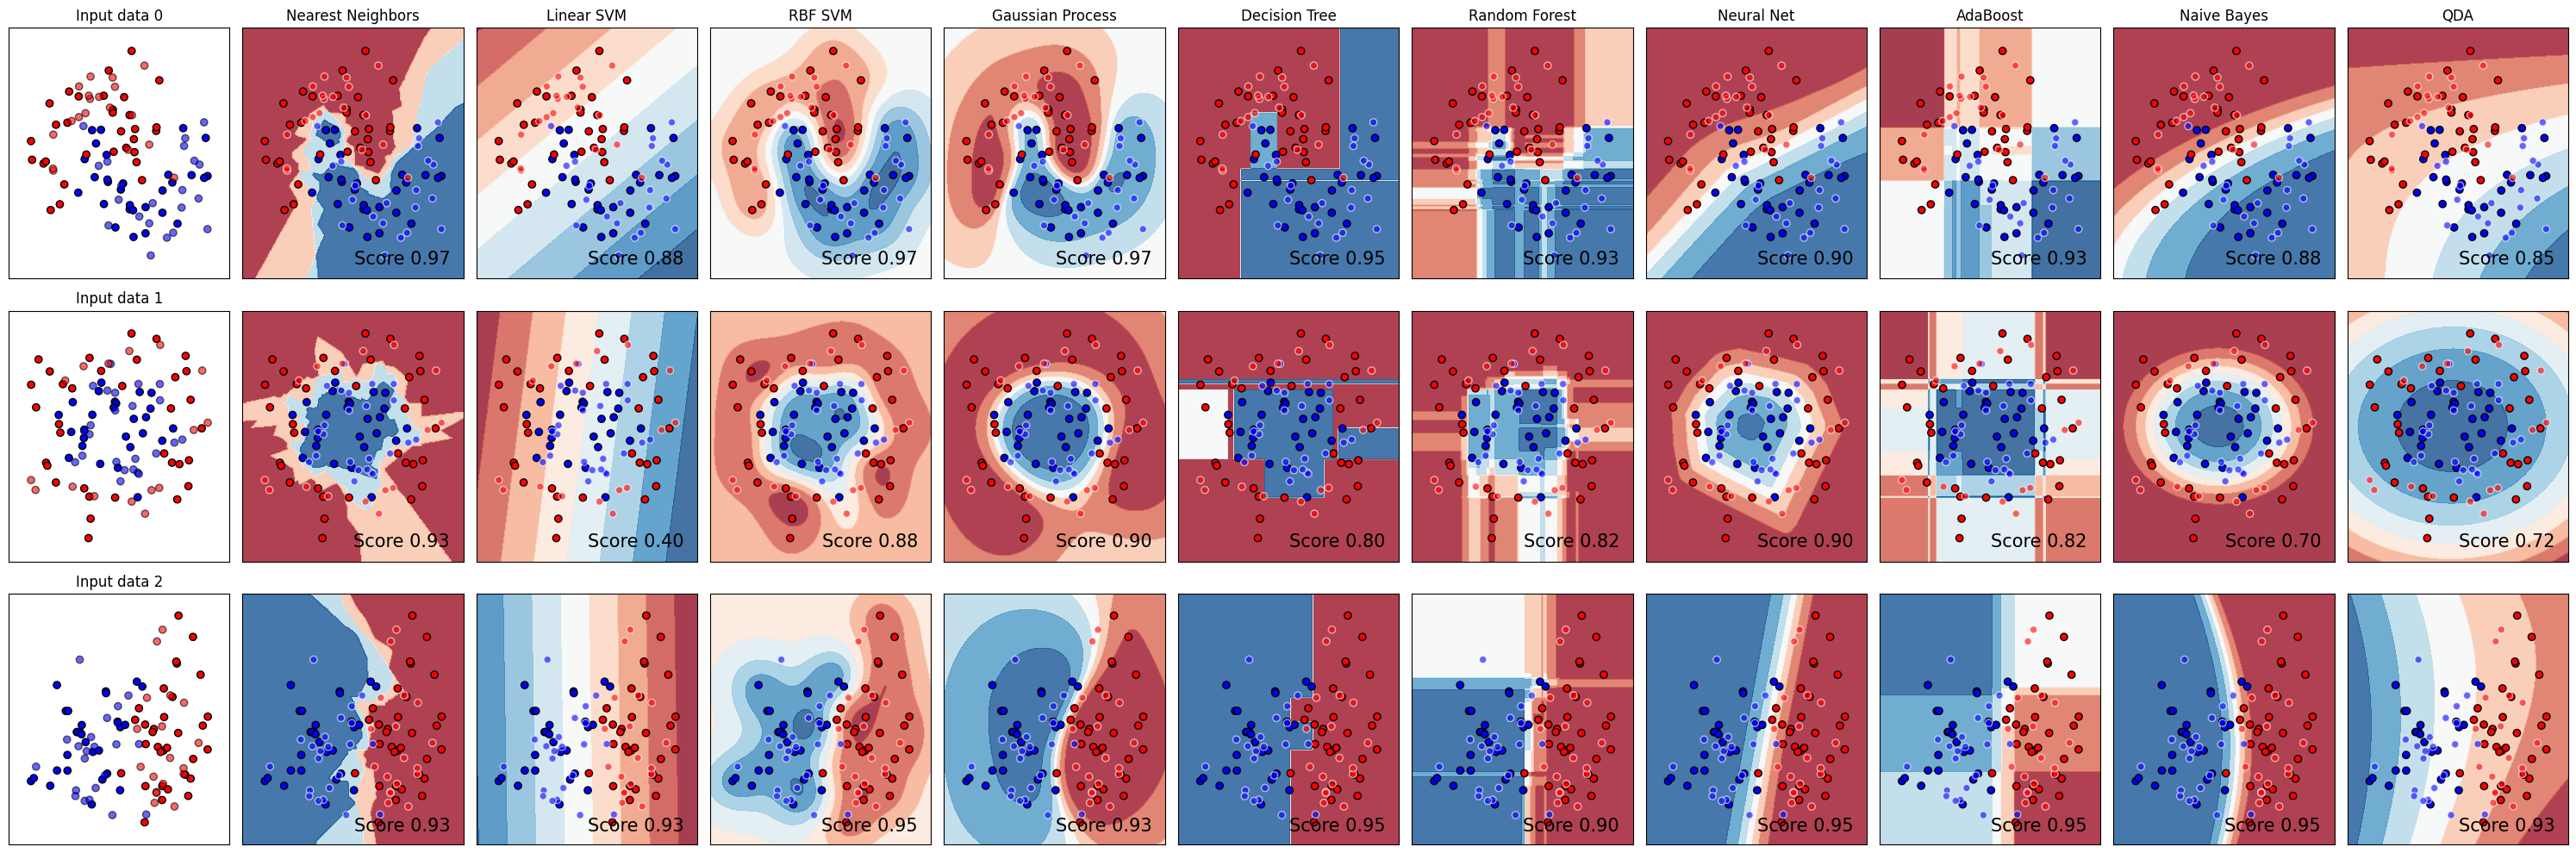

In [55]:
figure = plt.figure(figsize=(30, 10))
h = .02  # 격자 단계
i = 1

# 데이터셋들 마다 반복, 
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 데이터와 검증 데이터로 나눔
    X, y = ds
    X = StandardScaler().fit_transform(X)
    train_X, test_X, train_y, test_y = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 데이터셋을 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.set_title("Input data %d" % ds_cnt)
    
    # 학습 데이터의 산점도
    ax.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=cm_bright,
               edgecolors='k')
    # 검증 데이터의 산점도
    ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # 각 분류기마다 반복 처리함
    for name, model in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        model.fit(train_X, train_y)
        score = model.score(test_X, test_y)

        # 결정경계(decision boundary)를 그리기 위함
        # [x_min, x_max]x[y_min, y_max].
        if hasattr(model, "decision_function"):
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # 채워진 등고선(contourf)을 이용해 결정 경계를 시각화
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # 학습 데이터의 분류 예측 결과를 산점도로 시각화
        ax.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
                   cmap=cm_bright, edgecolors='k')
        # 검증 데이터의 분류 예측 결과를 산점도로 시각화
        ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright,
                   edgecolors='w', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, 
                ('Score %.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()